# Checking in Real & Simulated Quantum environments

## Hadamard gate circuit

In [4]:
import qiskit as qk
import numpy as np

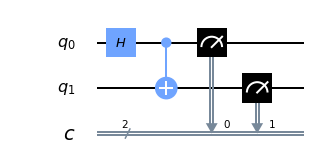

In [5]:
circuit = qk.QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0,1],[0,1])
circuit.draw(output="mpl")

## Reading token numbers & loading accounts

In [7]:
from qiskit import IBMQ
IBMQ.save_account(open("token.txt","r").read())

Credentials already present. Set overwrite=True to overwrite.


In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

## Status of Providers

In [9]:
provider = IBMQ.get_provider("ibm-q")
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print(
        f"{backend.name()} has {backend.status().pending_jobs} queued and {qubit_count} qubits"
    )

ibmq_qasm_simulator has 1 queued and simulated qubits
ibmqx2 has 10 queued and 5 qubits
ibmq_16_melbourne has 16 queued and 15 qubits
ibmq_vigo has 1 queued and 5 qubits
ibmq_ourense has 3 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 0 queued and 5 qubits
ibmq_essex has 1 queued and 5 qubits
ibmq_armonk has 2 queued and 1 qubits
ibmq_athens has 0 queued and 5 qubits
ibmq_rome has 1 queued and 5 qubits


## Real quantum computer

In [10]:
from qiskit.tools.monitor import job_monitor
backend = provider.get_backend('ibmq_burlington')
job = qk.execute(circuit, backend=backend, shots=500)
job_monitor(job)

Job Status: job has successfully run


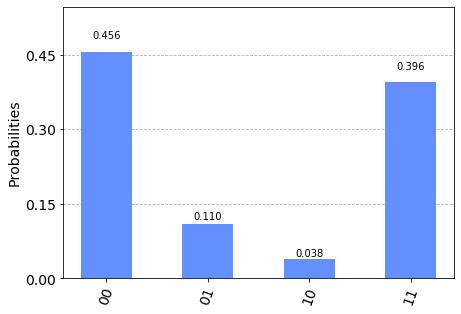

In [11]:
from qiskit.visualization import plot_histogram
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

## Simulated Quantum Computer

Job Status: job has successfully run


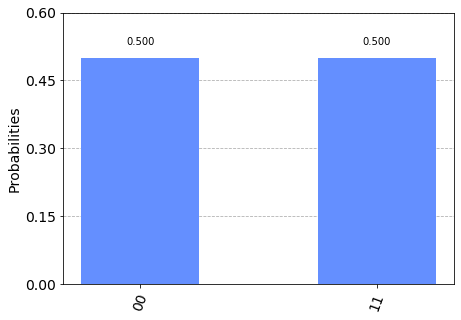

In [12]:
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_qasm_simulator')
job = qk.execute(circuit, backend=backend, shots=500)
job_monitor(job)
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])